### Compositional analysis of DMD Fibroblasts snRNA-Seq dataset using `ScCoda`
- **Developed by**: Srivalli Kolla
- **Talavera-López Lab - Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 19_06_2024
- **Last modified**: 19_06_2024

# Import statements and environments

In [60]:
import warnings

import pandas as pd

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

import scanpy as sc
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt
import pertpy as pt

### Set up working environment

In [61]:
sc.settings.verbosity = 3
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 300, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

# Data preparation

## Data loading

In [62]:
adata = sc.read_h5ad("../../data/heart_mm_nuclei-23-0092_FB_states_ctl240131.raw.h5ad")
adata

AnnData object with n_obs × n_vars = 9377 × 32285
    obs: 'cell_source', 'cell_type', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

### Data cleanup

In [63]:
adata.obs['cell_types'] = adata.obs['C_scANVI'].copy()
del adata.obs['cell_type'] 
adata.obs

,cell_source,donor,n_counts,n_genes,percent_mito,percent_ribo,region,sample,scrublet_score,cell_states,...,pct_counts_ribo,percent_mt2,percent_chrY,XIST-counts,S_score,G2M_score,_scvi_batch,_scvi_labels,C_scANVI,cell_types
TCGCAGGAGGCTTCCG-1-A9_2,HIRI-Nuclei,A9_2,21704.167582,4100,NaN,NaN,NaN,A9_2,NaN,NaN,...,2.181208,0.051699,0.052433,0.0,0.138445,-0.249553,0,5,FB6,FB6
CCGTTCACAAATTGCC-1-A9_2,HIRI-Nuclei,A9_2,20085.235445,3727,NaN,NaN,NaN,A9_2,NaN,NaN,...,0.511073,0.017888,0.158189,0.0,2.531231,4.013015,0,3,FB4,FB4
CCAAGCGGTTTCGTAG-1-A9_2,HIRI-Nuclei,A9_2,17265.164129,3080,NaN,NaN,NaN,A9_2,NaN,NaN,...,3.985056,0.050505,0.083022,0.0,-0.197844,-0.295802,0,5,FB6,FB6
AACGGGACACTCAAGT-1-A9_2,HIRI-Nuclei,A9_2,18226.763651,3271,NaN,NaN,NaN,A9_2,NaN,NaN,...,1.737660,0.025373,0.107643,0.0,0.319994,0.019119,0,5,FB6,FB6
GGAATGGAGACAACAT-1-A9_2,HIRI-Nuclei,A9_2,16886.781580,2987,NaN,NaN,NaN,A9_2,NaN,NaN,...,2.150709,0.059742,0.111518,0.0,0.042216,-0.392916,0,5,FB6,FB6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCTGAATGTTCCAAAC-1-B2_2,HIRI-Nuclei,B2_2,4475.382305,601,NaN,NaN,NaN,B2_2,NaN,NaN,...,2.523364,0.113084,0.000000,0.0,-0.102554,-0.133337,5,6,FB1,FB1
GAGATGGTCAGCAATC-1-B2_2,HIRI-Nuclei,B2_2,4649.491983,624,NaN,NaN,NaN,B2_2,NaN,NaN,...,3.594470,0.157604,0.000000,0.0,0.054592,-0.019439,5,6,FB2,FB2
TATTGGGGTAAGTTAG-1-B2_2,HIRI-Nuclei,B2_2,4805.336013,651,NaN,NaN,NaN,B2_2,NaN,NaN,...,3.053435,0.130725,0.286260,0.0,-0.016692,-0.084612,5,6,FB3,FB3
TGCAGTACATATTCGG-1-B2_2,HIRI-Nuclei,B2_2,5047.229118,689,NaN,NaN,NaN,B2_2,NaN,NaN,...,2.173913,0.120983,0.000000,0.0,0.254759,-0.167414,5,6,FB4,FB4


# ScCODA - All

In [64]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(adata, cell_type_identifier='cell_types', sample_identifier= 'sample', covariate_obs= ['cell_source','genotype' ,'sample','cell_type'] , type= 'cell_level')
sccoda_data

MuData object with n_obs × n_vars = 9383 × 32291
  2 modalities
    rna:	9377 x 32285
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'cell_types'
      var:	'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	6 x 6
      obs:	'cell_source', 'donor', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'

<Axes: xlabel='Cell type', ylabel='Proportion'>

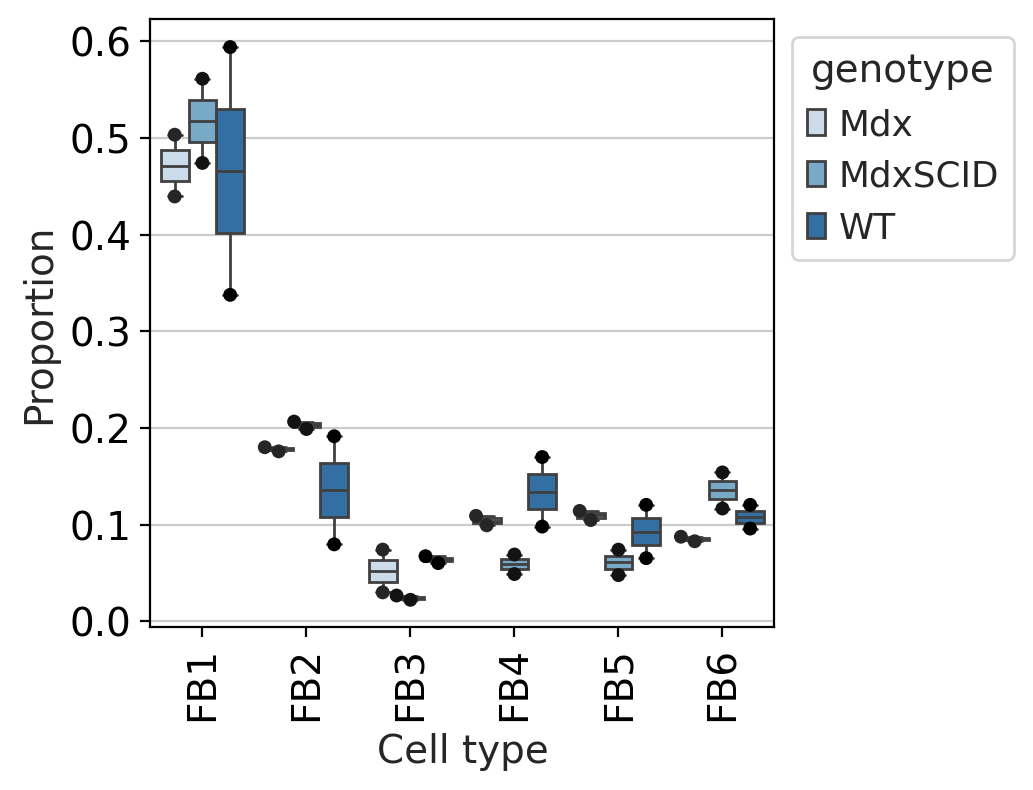

In [65]:
pt.pl.coda.boxplots(sccoda_data, add_dots= True, feature_name= 'genotype')

<Axes: title={'center': 'genotype'}, ylabel='Proportion'>

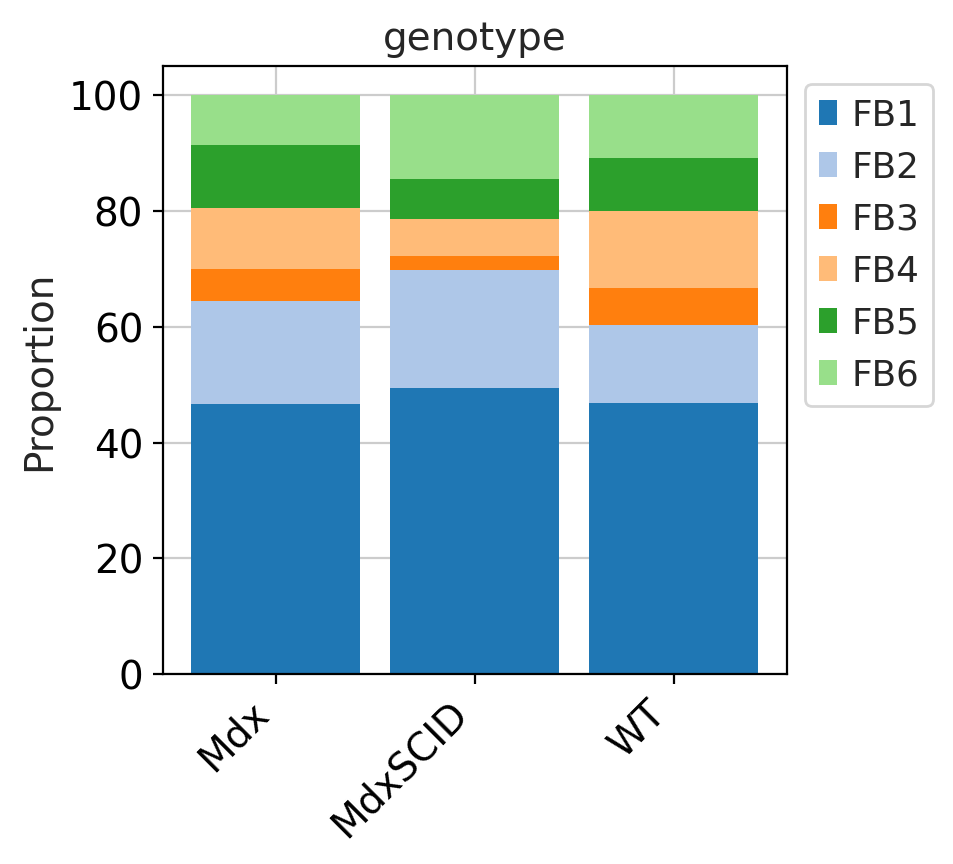

In [66]:
pt.pl.coda.stacked_barplot(sccoda_data, feature_name='genotype')

<Axes: title={'center': 'donor'}, ylabel='Proportion'>

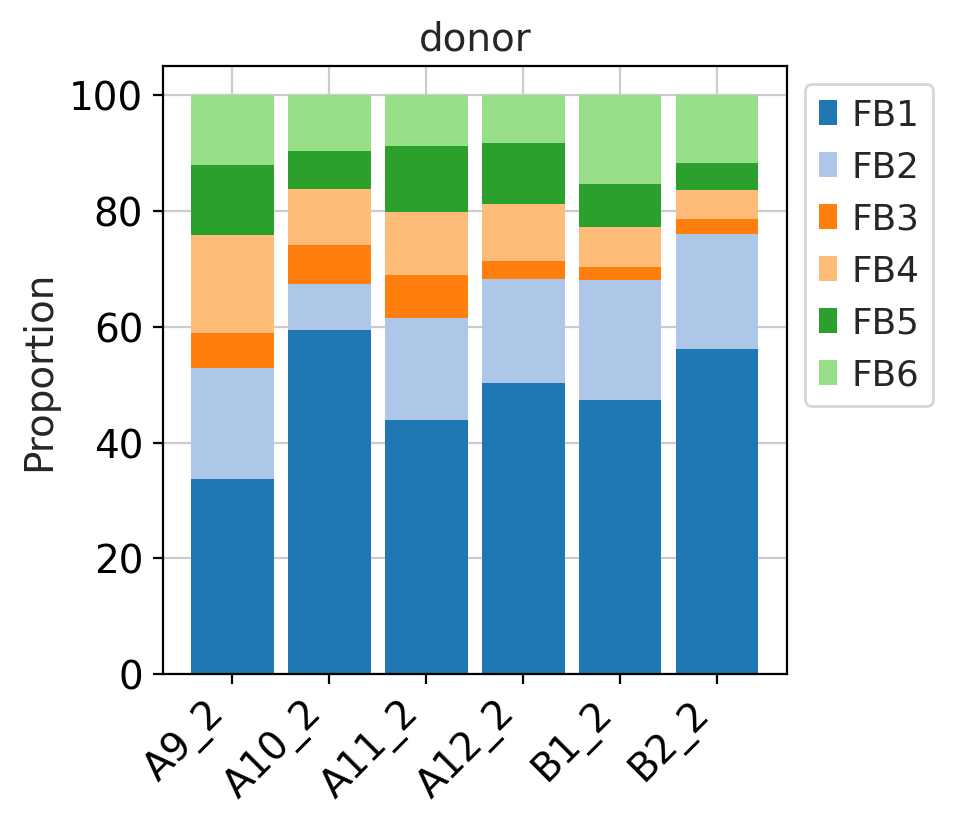

In [67]:
pt.pl.coda.stacked_barplot(sccoda_data, feature_name='donor')

In [68]:
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key= 'coda', formula= 'genotype')
sccoda_model.run_nuts(sccoda_data, modality_key= 'coda')

Automatic reference selection! Reference cell type set to FB6

sample: 100%|██████████| 11000/11000 [00:11<00:00, 963.86it/s, 255 steps of size 3.20e-02. acc. prob=0.79] 


In [69]:
sccoda_model.set_fdr(sccoda_data, 0.05)

In [70]:
sccoda_data

MuData object with n_obs × n_vars = 9383 × 32291
  2 modalities
    rna:	9377 x 32285
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'cell_types'
      var:	'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	6 x 6
      obs:	'cell_source', 'donor', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_genotype[T.MdxSCID]', 'effect_df_genotype[T.WT]'

In [71]:
sccoda_data['coda'].varm['effect_df_genotype[T.MdxSCID]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
FB1,0.0,-0.244,0.494,0.134,0.4006,743.539235,0.0
FB2,0.0,-0.250,0.643,0.180,0.4557,270.540426,0.0
FB3,0.0,-1.192,0.253,0.368,0.5803,74.174582,0.0
FB4,0.0,-1.096,0.147,0.353,0.6357,157.814696,0.0
FB5,0.0,-0.997,0.221,0.299,0.5497,144.087613,0.0
FB6,0.0,0.000,0.000,0.000,0.0000,172.676782,0.0


In [72]:
sccoda_data['coda'].varm['effect_df_genotype[T.WT]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
FB1,0.0,-0.474,0.238,0.129,0.4254,743.539235,0.0
FB2,0.0,-0.772,0.170,0.243,0.5554,270.540426,0.0
FB3,0.0,-0.302,0.879,0.241,0.5098,74.174582,0.0
FB4,0.0,-0.278,0.741,0.211,0.4955,157.814696,0.0
FB5,0.0,-0.533,0.455,0.167,0.4448,144.087613,0.0
FB6,0.0,0.000,0.000,0.000,0.0000,172.676782,0.0


In [73]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate            Cell Type
genotype[T.MdxSCID]  FB1          False
                     FB2          False
                     FB3          False
                     FB4          False
                     FB5          False
                     FB6          False
genotype[T.WT]       FB1          False
                     FB2          False
                     FB3          False
                     FB4          False
                     FB5          False
                     FB6          False
Name: Final Parameter, dtype: bool

In [74]:
mdx_data = adata[adata.obs['genotype'].isin(['WT', 'Mdx'])].copy()
mdxscid_data = adata[adata.obs['genotype'].isin(['WT', 'MdxSCID'])].copy()

# ScCODA - Mdx

In [75]:
mdx_model = pt.tl.Sccoda()
sccoda_mdx_data = mdx_model.load(mdx_data, cell_type_identifier='cell_types', sample_identifier= 'sample', covariate_obs= ['cell_source','genotype' ,'sample','cell_type'] , type= 'cell_level')
sccoda_mdx_data

MuData object with n_obs × n_vars = 5513 × 32291
  2 modalities
    rna:	5509 x 32285
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'cell_types'
      var:	'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	4 x 6
      obs:	'cell_source', 'donor', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'

<Axes: xlabel='Cell type', ylabel='Proportion'>

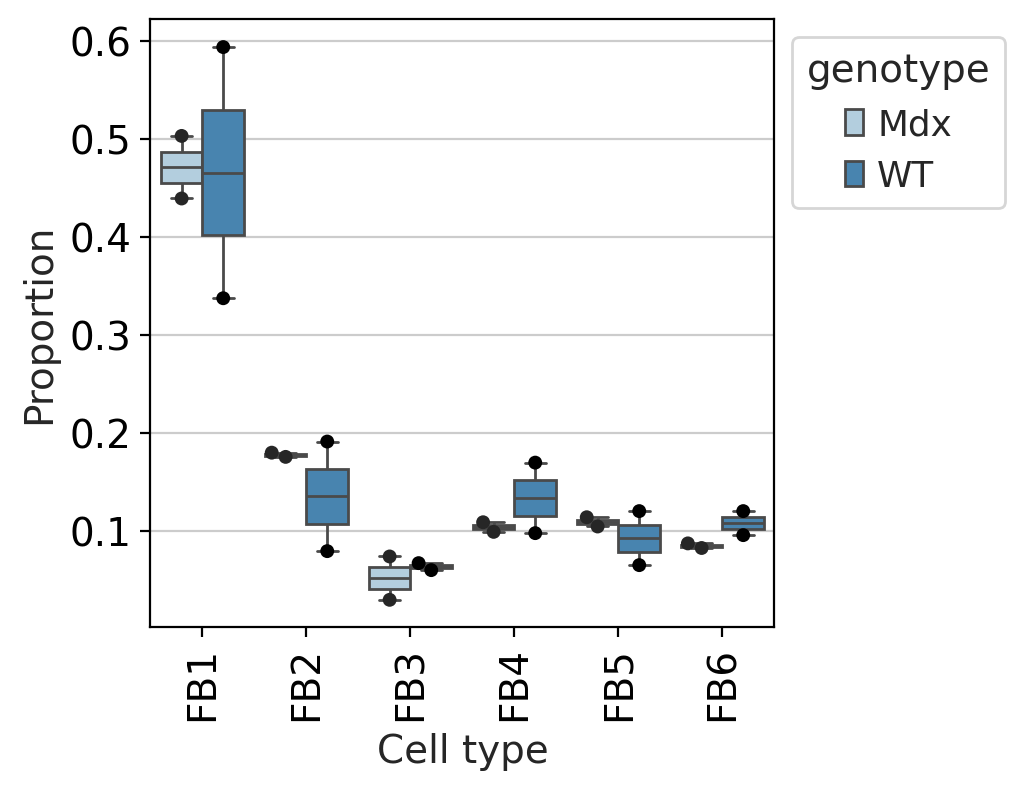

In [76]:
pt.pl.coda.boxplots(sccoda_mdx_data, add_dots= True, feature_name= 'genotype')

<Axes: title={'center': 'genotype'}, ylabel='Proportion'>

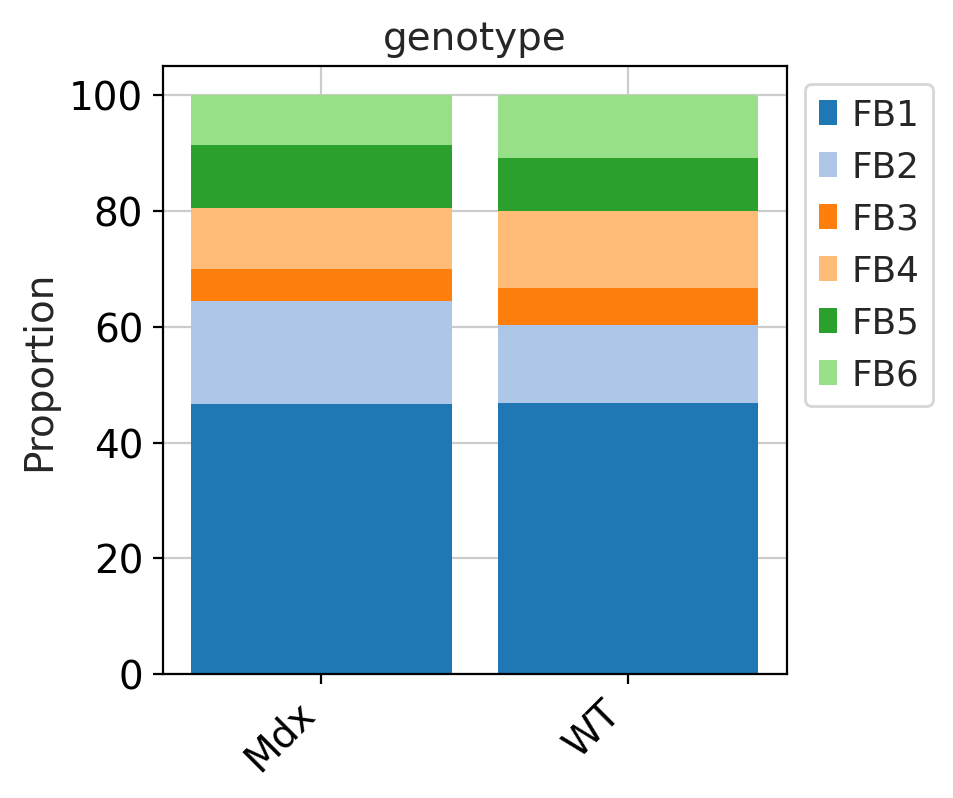

In [77]:
pt.pl.coda.stacked_barplot(sccoda_mdx_data, feature_name='genotype')

<Axes: title={'center': 'donor'}, ylabel='Proportion'>

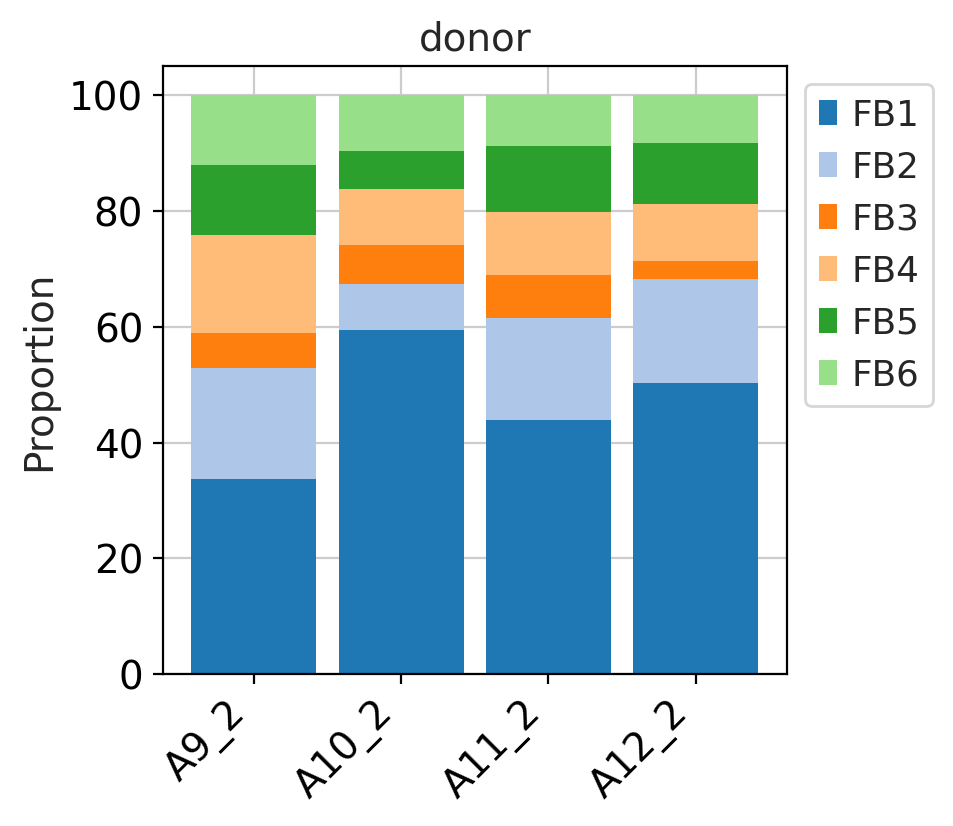

In [78]:
pt.pl.coda.stacked_barplot(sccoda_mdx_data, feature_name='donor')

In [79]:
sccoda_mdx_data = mdx_model.prepare(sccoda_mdx_data, modality_key= 'coda', formula= 'genotype')
mdx_model.run_nuts(sccoda_mdx_data, modality_key= 'coda')

Automatic reference selection! Reference cell type set to FB6

sample: 100%|██████████| 11000/11000 [00:05<00:00, 1985.21it/s, 63 steps of size 5.79e-02. acc. prob=0.79]


In [80]:
mdx_model.set_fdr(sccoda_mdx_data, 0.05)

In [81]:
sccoda_mdx_data

MuData object with n_obs × n_vars = 5513 × 32291
  2 modalities
    rna:	5509 x 32285
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'cell_types'
      var:	'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	4 x 6
      obs:	'cell_source', 'donor', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_genotype[T.WT]'

In [82]:
sccoda_mdx_data['coda'].varm['effect_df_genotype[T.WT]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
FB1,0.0,-0.446,0.280,0.122,0.4211,641.152756,0.0
FB2,0.0,-0.712,0.249,0.213,0.5080,219.481454,0.0
FB3,0.0,-0.389,0.749,0.203,0.4730,77.965603,0.0
FB4,0.0,-0.312,0.586,0.158,0.4482,160.335379,0.0
FB5,0.0,-0.639,0.348,0.176,0.4569,142.774682,0.0
FB6,0.0,0.000,0.000,0.000,0.0000,135.540127,0.0


In [83]:
mdx_model.credible_effects(sccoda_mdx_data, modality_key="coda")

Covariate       Cell Type
genotype[T.WT]  FB1          False
                FB2          False
                FB3          False
                FB4          False
                FB5          False
                FB6          False
Name: Final Parameter, dtype: bool

# ScCODA - MdxSCID

In [84]:
mdxscid_model = pt.tl.Sccoda()
sccoda_mdxscid_data = mdxscid_model.load(mdxscid_data, cell_type_identifier='cell_types', sample_identifier= 'sample', covariate_obs= ['cell_source','genotype' ,'sample','cell_type'] , type= 'cell_level')
sccoda_mdxscid_data

MuData object with n_obs × n_vars = 4827 × 32291
  2 modalities
    rna:	4823 x 32285
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'cell_types'
      var:	'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	4 x 6
      obs:	'cell_source', 'donor', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'

<Axes: xlabel='Cell type', ylabel='Proportion'>

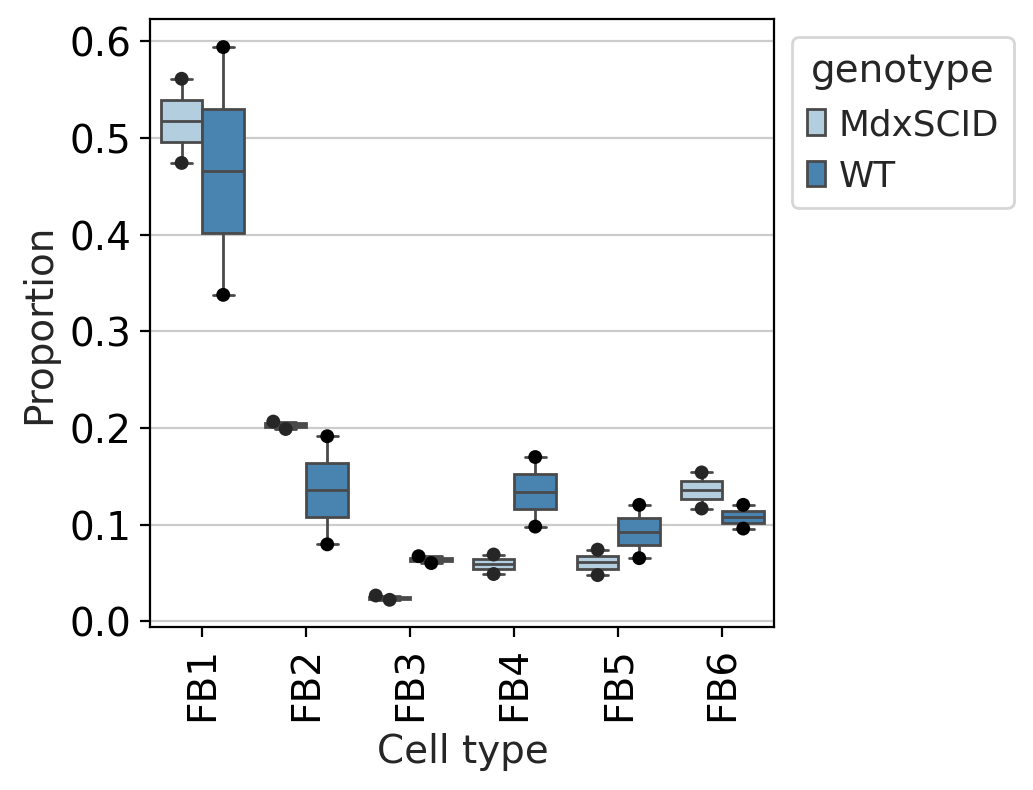

In [85]:
pt.pl.coda.boxplots(sccoda_mdxscid_data, add_dots= True, feature_name= 'genotype')

<Axes: title={'center': 'genotype'}, ylabel='Proportion'>

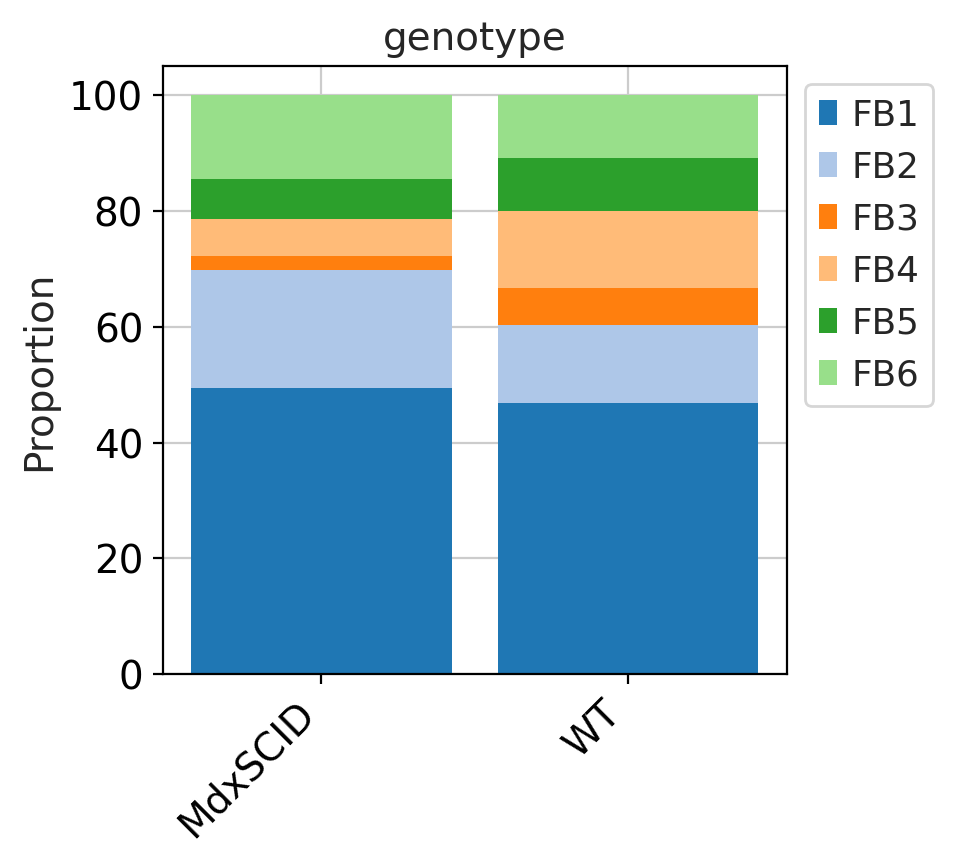

In [86]:
pt.pl.coda.stacked_barplot(sccoda_mdxscid_data, feature_name='genotype')

<Axes: title={'center': 'donor'}, ylabel='Proportion'>

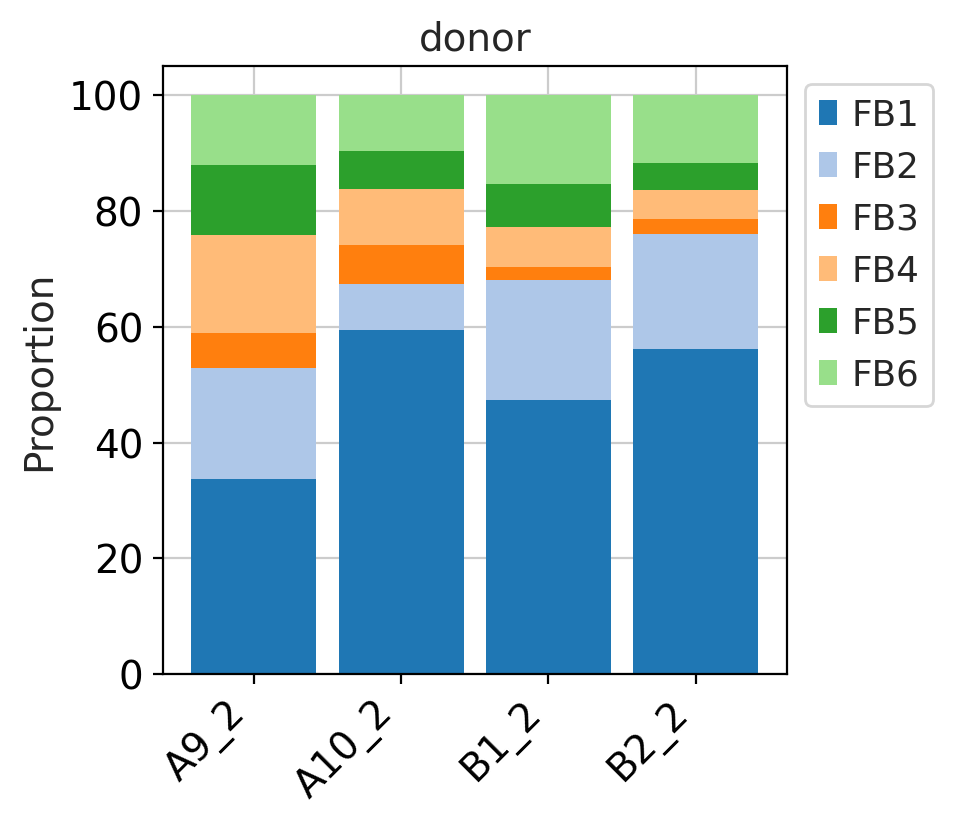

In [87]:
pt.pl.coda.stacked_barplot(sccoda_mdxscid_data, feature_name='donor')

In [88]:
sccoda_mdxscid_data = mdx_model.prepare(sccoda_mdxscid_data, modality_key= 'coda', formula= 'genotype')
mdx_model.run_nuts(sccoda_mdxscid_data, modality_key= 'coda')

Automatic reference selection! Reference cell type set to FB6

sample: 100%|██████████| 11000/11000 [00:06<00:00, 1619.36it/s, 63 steps of size 4.19e-02. acc. prob=0.80] 


In [89]:
mdx_model.set_fdr(sccoda_mdxscid_data, 0.05)

In [90]:
sccoda_mdxscid_data

MuData object with n_obs × n_vars = 4827 × 32291
  2 modalities
    rna:	4823 x 32285
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'cell_states', 'seed_labels', 'genotype', 'batch', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'cell_types'
      var:	'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	4 x 6
      obs:	'cell_source', 'donor', 'genotype', 'batch', '_scvi_batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_genotype[T.WT]'

In [91]:
sccoda_mdxscid_data['coda'].varm['effect_df_genotype[T.WT]']

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
FB1,0.0,-0.638,0.345,0.188,0.4378,601.960210,0.0
FB2,0.0,-0.952,0.263,0.294,0.5442,214.903985,0.0
FB3,0.0,-0.432,1.286,0.399,0.5425,49.510826,0.0
FB4,0.0,-0.286,1.216,0.383,0.5961,98.414815,0.0
FB5,0.0,-0.474,0.861,0.254,0.4819,90.124437,0.0
FB6,0.0,0.000,0.000,0.000,0.0000,150.835727,0.0


In [92]:
mdx_model.credible_effects(sccoda_mdxscid_data, modality_key="coda")

Covariate       Cell Type
genotype[T.WT]  FB1          False
                FB2          False
                FB3          False
                FB4          False
                FB5          False
                FB6          False
Name: Final Parameter, dtype: bool